# Import Python Libraries

In [316]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import Data from CSV File

In [317]:
df = pd.read_csv('D:/Projects/ML_Practice_Projects/customerChurnModelling/notebook/data/customerChurnModelling.csv')

# Data Cleaning

In [318]:
# Drop non-predictable columns - RowNumber, CustomerId, Surname
columnsToDrop = ['RowNumber','CustomerId','Surname']
df.drop(columnsToDrop, axis=1, inplace=True)

# Exploratory Data Analysis

In [319]:
# Inspect Head
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [320]:
# Inspect Tail
df.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


# Observation

- All the column names are already standardized
- Columns RowNumber, CustomerId, Surname can be dropped
- We can perform both Classification and Regression problems
    - Binary Classification - Exited
    - Multi-class Classification - Satisfaction Score
    - Regression Problem - Points Earned, CreditScore

In [321]:
# Inspect Structure
df.shape

(10000, 15)

# Observation

- Dataset has 10k rows and 18 columns

In [322]:
# Inspect Variablesname
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')

In [323]:
# Inspect Variablename and their datatype
df.dtypes

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [324]:
# Inspect Non-Missing Values
df.count()

CreditScore           10000
Geography             10000
Gender                10000
Age                   10000
Tenure                10000
Balance               10000
NumOfProducts         10000
HasCrCard             10000
IsActiveMember        10000
EstimatedSalary       10000
Exited                10000
Complain              10000
Satisfaction Score    10000
Card Type             10000
Point Earned          10000
dtype: int64

In [325]:
# Inspect Unique Values
df.nunique()

CreditScore            460
Geography                3
Gender                   2
Age                     70
Tenure                  11
Balance               6382
NumOfProducts            4
HasCrCard                2
IsActiveMember           2
EstimatedSalary       9999
Exited                   2
Complain                 2
Satisfaction Score       5
Card Type                4
Point Earned           785
dtype: int64

In [326]:
# Inspect Meta-Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

# Descriptive Statistics Summary

In [327]:
# Numeric Variables
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [328]:
# Categorical Variables
df.describe(include='object')

,Geography,Gender,Card Type
count,10000,10000,10000
unique,3,2,4
top,France,Male,DIAMOND
freq,5014,5457,2507


# Handling Duplicates

In [329]:
df.duplicated().sum()

0

# Handling Missing Values

In [330]:
df.isna().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

# Separate Numeric and Categorical Columns

In [331]:
# Separate int64, float64, and categorical columns
int_columns = df.select_dtypes(include='int64').columns
float_columns = df.select_dtypes(include='float64').columns
categorical_columns = df.select_dtypes(exclude=['int64', 'float64']).columns

print("\nInteger Columns:", int_columns)
#print(df[int_columns])

print("\nFloat Columns:", float_columns)
#print(df[float_columns])

print("\nCategorical Columns:", categorical_columns)
#print(df[categorical_columns])


Integer Columns: Index(['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited', 'Complain', 'Satisfaction Score',
       'Point Earned'],
      dtype='object')

Float Columns: Index(['Balance', 'EstimatedSalary'], dtype='object')

Categorical Columns: Index(['Geography', 'Gender', 'Card Type'], dtype='object')


# Univariate Analysis

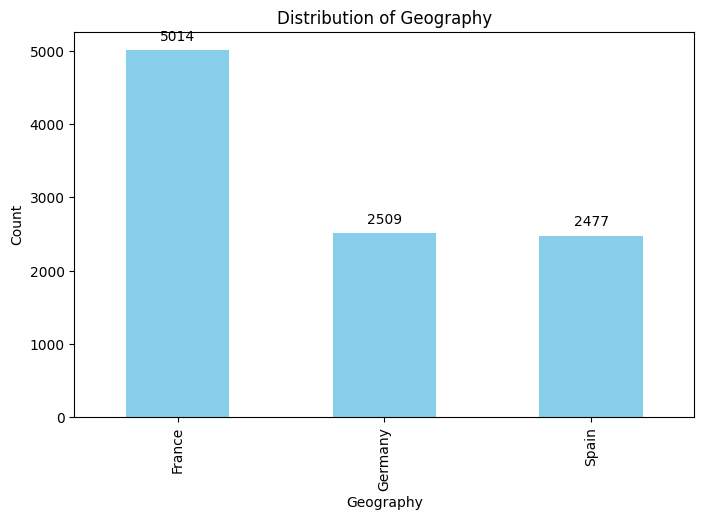

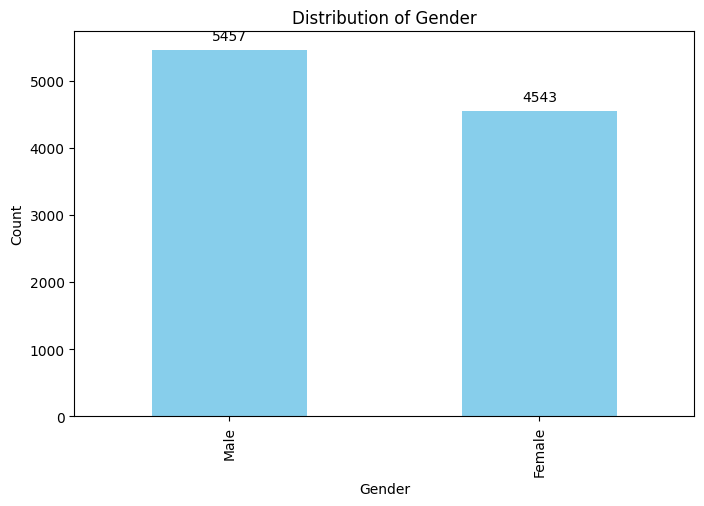

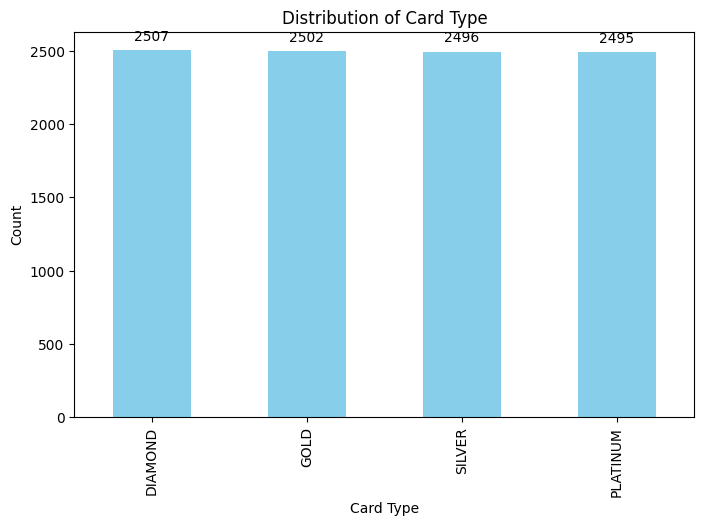

In [332]:
# Visualize distribution of categorical columns with data labels
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    ax = df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title("Distribution of {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Count")

    # Add data labels
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.show()

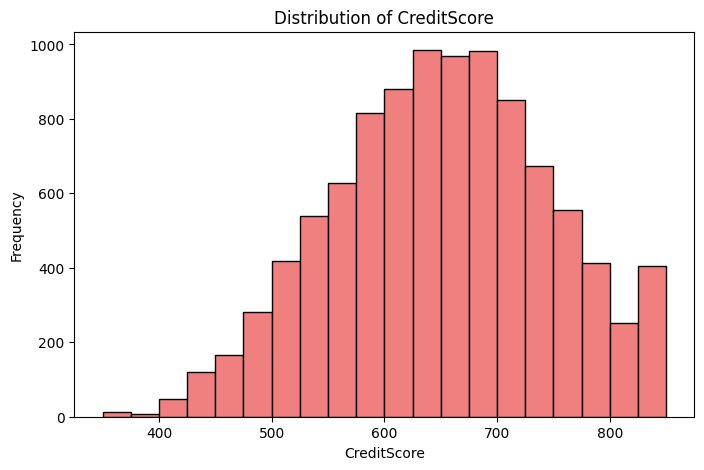

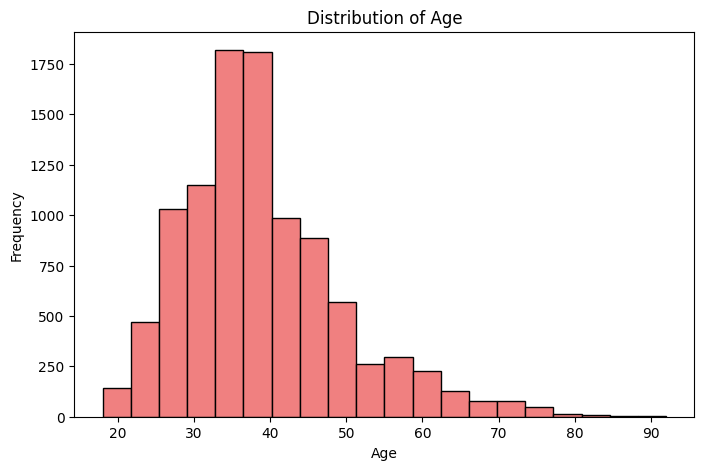

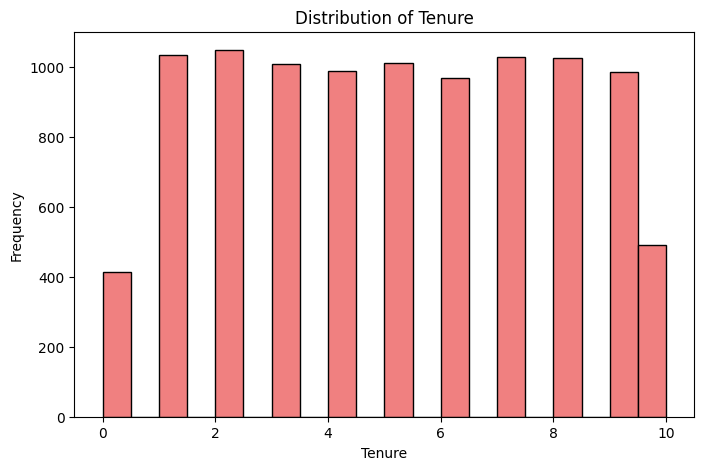

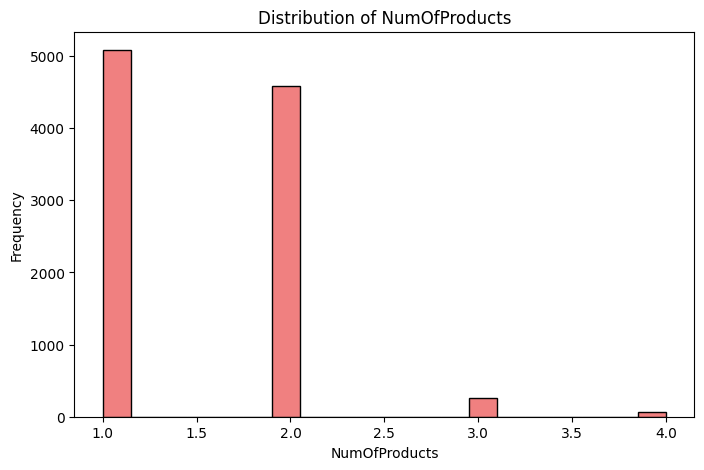

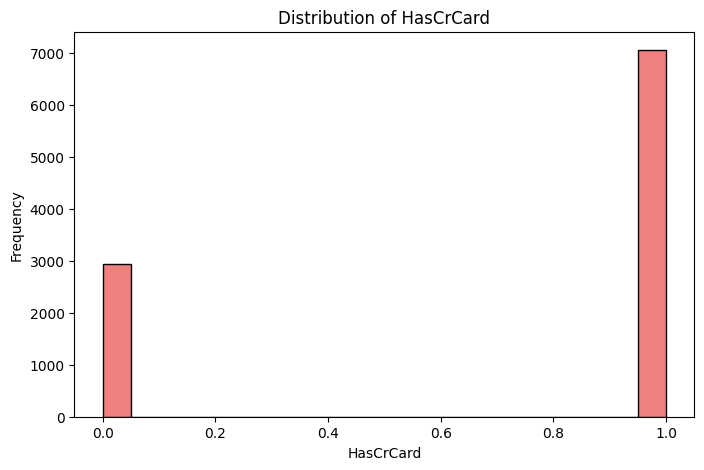

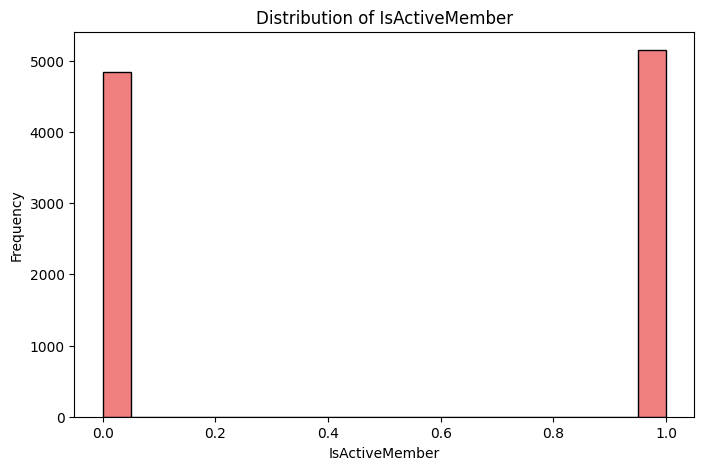

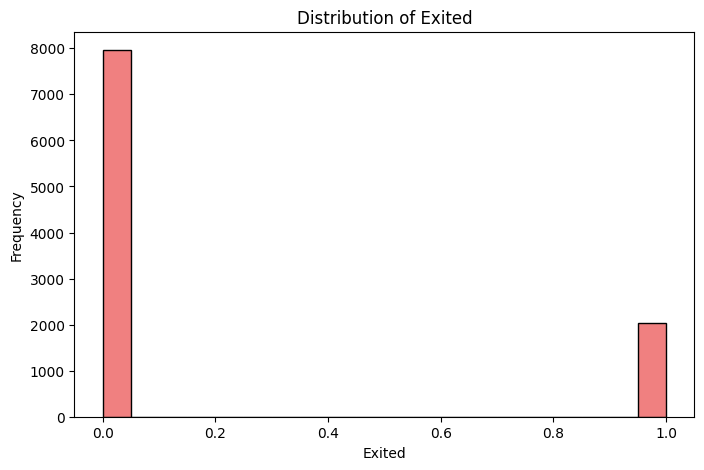

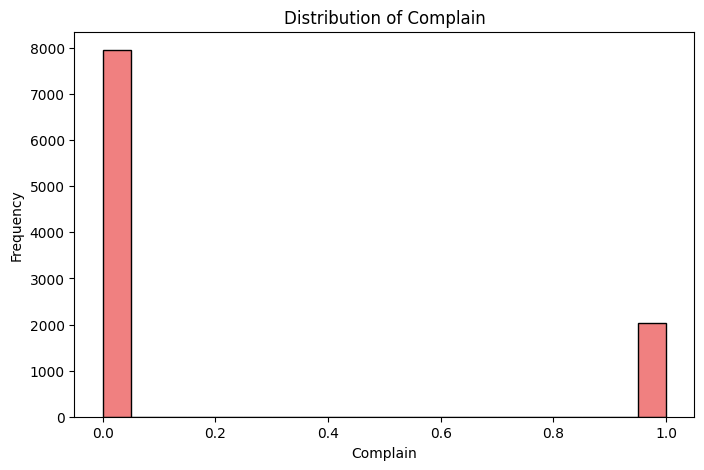

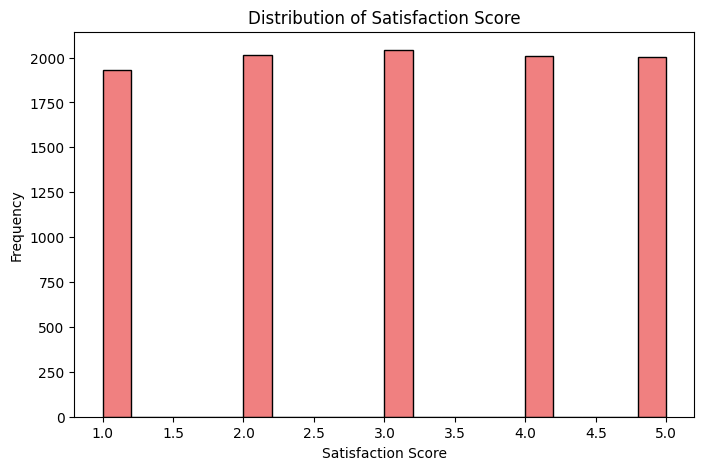

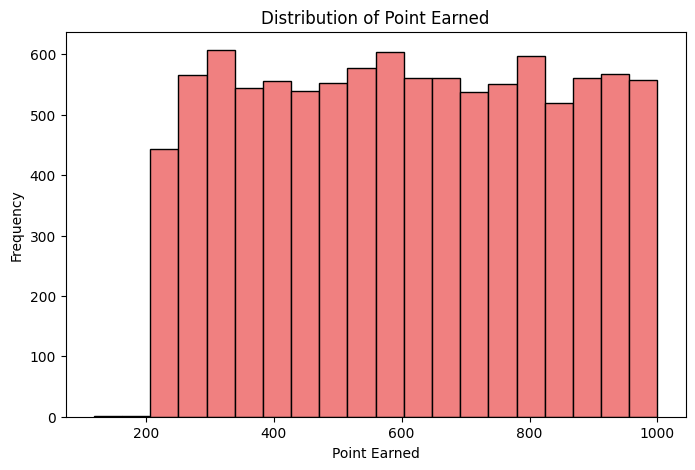

In [333]:
# Visualize distribution of int64 columns
for column in int_columns:
    plt.figure(figsize=(8, 5))
    df[column].plot(kind='hist', color='lightcoral', bins=20, edgecolor='black')
    plt.title("Distribution of {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

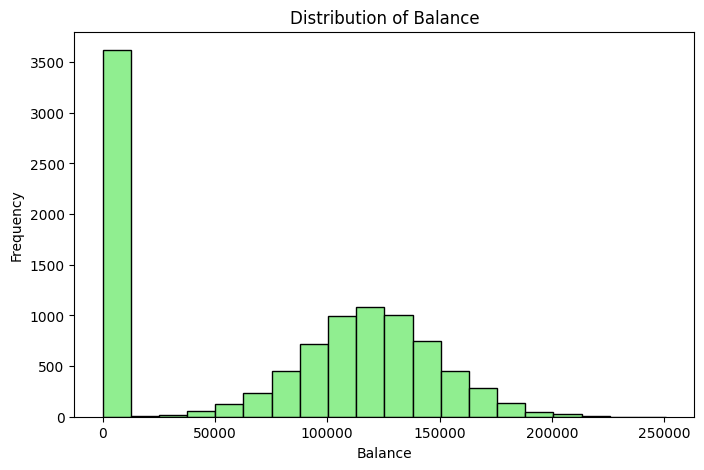

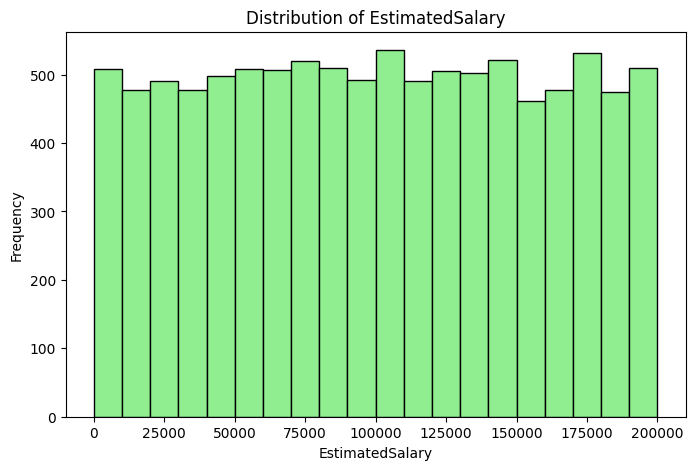

In [334]:
# Visualize distribution of float64 columns
for column in float_columns:
    plt.figure(figsize=(8, 5))
    df[column].plot(kind='hist', color='lightgreen', bins=20, edgecolor='black')
    plt.title("Distribution of {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

# Bi-Variate Analysis

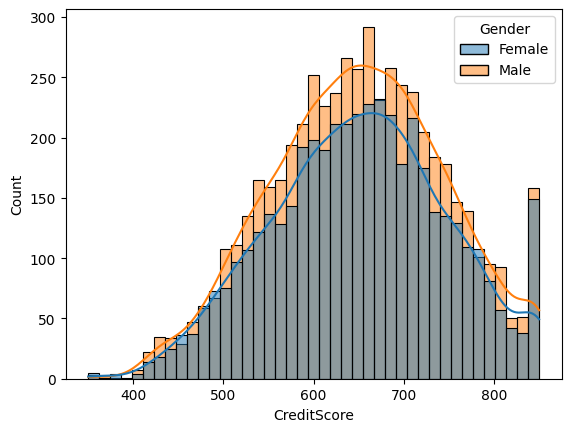

In [335]:

ax =sns.histplot(data=df,x='CreditScore',kde=True,hue='Gender')

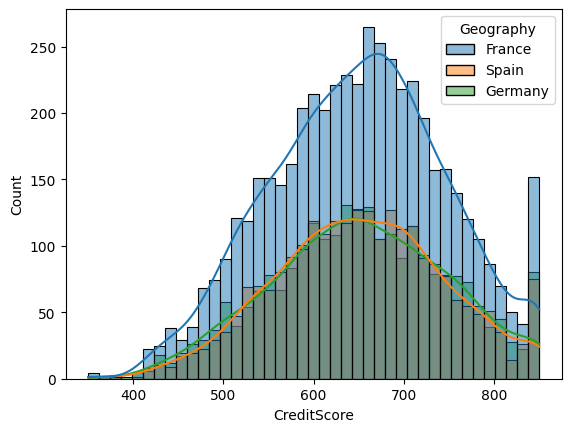

In [336]:
ax =sns.histplot(data=df,x='CreditScore',kde=True,hue='Geography')

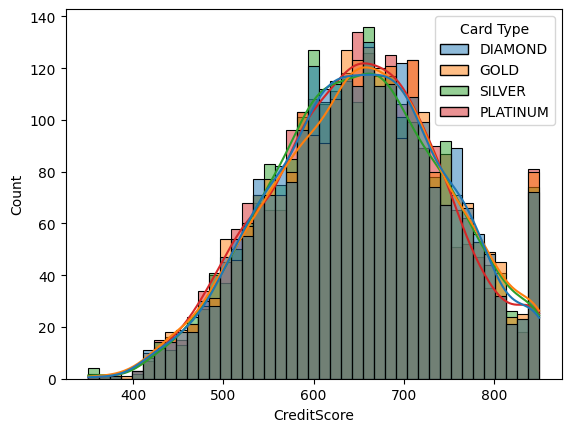

In [337]:
ax =sns.histplot(data=df,x='CreditScore',kde=True,hue='Card Type')

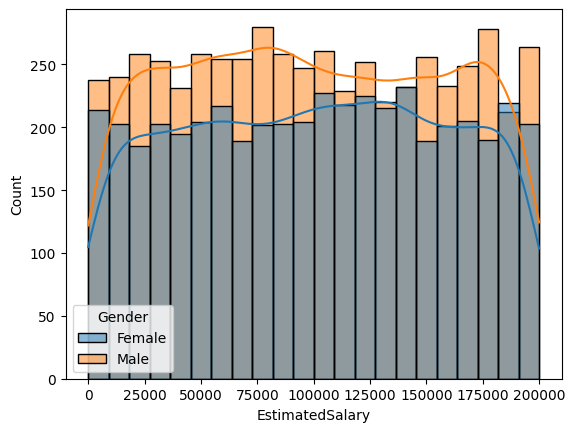

In [338]:
ax =sns.histplot(data=df,x='EstimatedSalary',kde=True,hue='Gender')

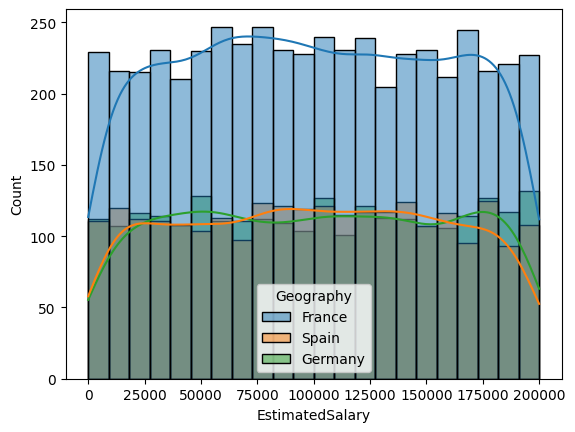

In [339]:
ax =sns.histplot(data=df,x='EstimatedSalary',kde=True,hue='Geography')

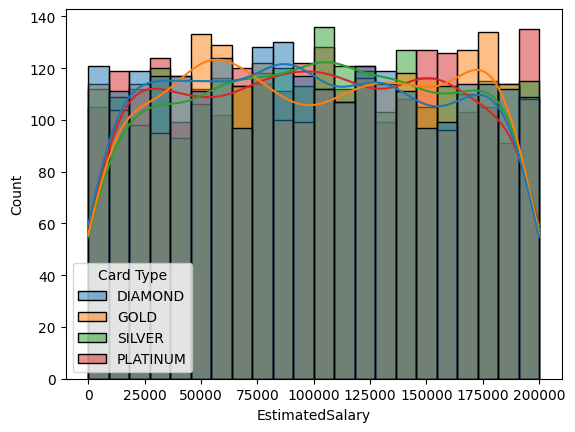

In [340]:
ax =sns.histplot(data=df,x='EstimatedSalary',kde=True,hue='Card Type')

# Handling Outliers

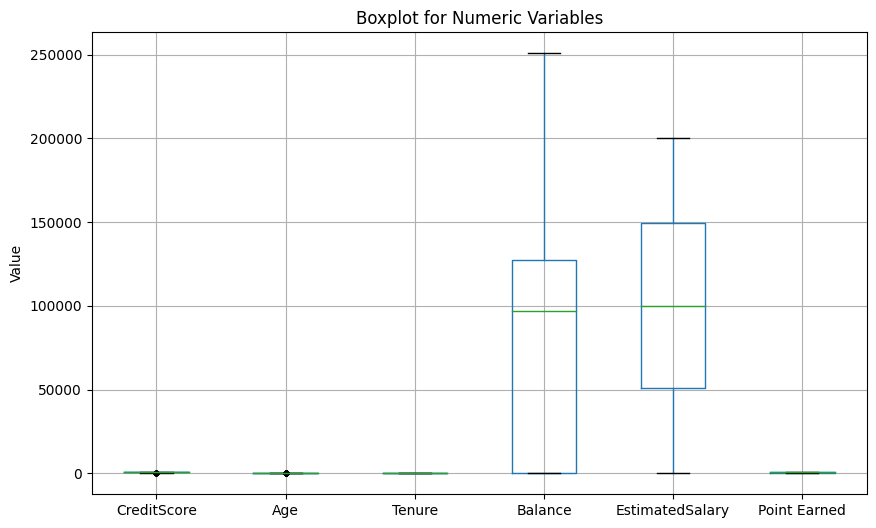

In [341]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
columns = ['CreditScore','Age','Tenure','Balance','EstimatedSalary','Point Earned']

# Create boxplot for all numeric variables
plt.figure(figsize=(10, 6))
df[columns].boxplot(sym='k.')
plt.title("Boxplot for Numeric Variables")
plt.ylabel("Value")
plt.show()

# Categorical Encoding

### One-Hot Encoding

In [342]:
from sklearn.preprocessing import OneHotEncoder

# Select two categorical variables for One-Hot Encoding
columns_to_encode = ['Geography', 'Gender']

oh_transformer = OneHotEncoder()
oh_transformer.fit_transform(columns_to_encode)

# # Perform One-Hot Encoding
# encoded_df = pd.get_dummies(df[columns_to_encode])
# #encoded_df = pd.get_dummies(df[columns_to_encode],drop_first=True)

# # Concatenate the original DataFrame with the encoded columns
# df = pd.concat([df, encoded_df], axis=1)

# df = df.drop(columns=['Geography','Gender'])


ValueError: Expected 2D array, got 1D array instead:
array=['Geography' 'Gender'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339,False,True,False,False,True


### Ordinal Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Select the categorical variable for Ordinal Encoding
column_to_encode = 'Card Type'

# Create an instance of OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the selected column
df[[column_to_encode]] = ordinal_encoder.fit_transform(df[[column_to_encode]])

# Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target variable (y)
X = df.drop('Point Earned', axis=1)
y = df['Point Earned']

scaling = StandardScaler()
scaling.fit_transform(X)


# Split the data into training and testing sets
# By default, it splits 75% for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7500, 17)
X_test shape: (2500, 17)
y_train shape: (7500,)
y_test shape: (2500,)


# Model Evaluation Function

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 224.2383
- Mean Absolute Error: 193.2562
- R2 Score: 0.0021
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 230.4230
- Mean Absolute Error: 200.8030
- R2 Score: -0.0022


Lasso
Model performance for Training set
- Root Mean Squared Error: 224.3612
- Mean Absolute Error: 193.3698
- R2 Score: 0.0010
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 230.2579
- Mean Absolute Error: 200.7649
- R2 Score: -0.0008


Ridge
Model performance for Training set
- Root Mean Squared Error: 224.2395
- Mean Absolute Error: 193.2640
- R2 Score: 0.0021
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 230.4196
- Mean Absolute Error: 200.8104
- R2 Score: -0.0022




K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 200.9739
- Mean Absolute Error: 167.6514
- R2 Score: 0.1984
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 252.7573
- Mean Absolute Error: 214.2065
- R2 Score: -0.2059


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 327.1306
- Mean Absolute Error: 266.0480
- R2 Score: -1.0200


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 85.8220
- Mean Absolute Error: 72.5894
- R2 Score: 0.8538
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 235.0830
- Mean Absolute Error: 203.2566
- R2 Score: -0.0432


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 143.3394
- Mean Absolute Error: 115.7